## Convolutional Autoencoder(MNIST)

In [8]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, InputLayer
import matplotlib.pyplot as plt
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train[:,:,:,np.newaxis]/255.
x_test = x_test[:,:,:,np.newaxis]/255.
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [11]:
autoencoder = Sequential()
autoencoder.add(Conv2D(16,kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8,kernel_size=3, padding='same', activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(4,kernel_size=3, padding='same', activation='relu'))

autoencoder.add(Conv2D(4,kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8,kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16,kernel_size=3, padding='same', activation='relu'))
autoencoder.add(Conv2D(1,kernel_size=3, padding='same', activation='sigmoid'))
autoencoder.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 7, 7, 4)           292       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 7, 7, 4)           148       
_________________________________________________________________
up_sampling2d_13 (UpSampling (None, 14, 14, 4)        

In [14]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train,x_train,epochs=50, batch_size = 128, validation_data=(x_train,x_train))

Epoch 1/50
469/469 [==============================] - 40s 85ms/step - loss: 0.0971 - val_loss: 0.0908
Epoch 2/50
469/469 [==============================] - 39s 84ms/step - loss: 0.0871 - val_loss: 0.0844
Epoch 3/50
469/469 [==============================] - 39s 84ms/step - loss: 0.0826 - val_loss: 0.0810
Epoch 4/50
469/469 [==============================] - 40s 86ms/step - loss: 0.0800 - val_loss: 0.0790
Epoch 5/50
469/469 [==============================] - 40s 84ms/step - loss: 0.0783 - val_loss: 0.0776
Epoch 6/50
469/469 [==============================] - 40s 85ms/step - loss: 0.0769 - val_loss: 0.0763
Epoch 7/50
469/469 [==============================] - 40s 84ms/step - loss: 0.0759 - val_loss: 0.0756
Epoch 8/50
469/469 [==============================] - 40s 85ms/step - loss: 0.0751 - val_loss: 0.0747
Epoch 9/50
469/469 [==============================] - 39s 84ms/step - loss: 0.0745 - val_loss: 0.0742
Epoch 10/50
469/469 [==============================] - 39s 84ms/step - loss: 0.074

KeyboardInterrupt: 

In [15]:
ae_imgs = autoencoder.predict(x_test)

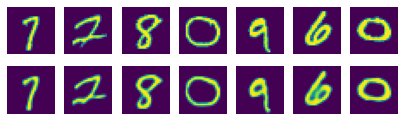

In [16]:
random_test = np.random.randint(x_test.shape[0], size=7)

plt.figure(figsize=(7,2))
for i, img_idx in enumerate(random_test):
    ax = plt.subplot(2,7,i+1)
    plt.imshow(x_test[img_idx].reshape(28,28))
    ax.axis('off')
    
    ax = plt.subplot(2,7,7+i+1)
    plt.imshow(ae_imgs[img_idx].reshape(28,28))
    ax.axis('off')
plt.show()

## MobileNet

In [31]:
import tensorflow as tf
mobilenet_model = tf.keras.applications.MobileNetV2(weights='imagenet')
mobilenet_model.summary()

14540800/14536120 [==============================] - 1s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________

block_5_depthwise (DepthwiseCon (None, 28, 28, 192)  1728        block_5_expand_relu[0][0]        
__________________________________________________________________________________________________
block_5_depthwise_BN (BatchNorm (None, 28, 28, 192)  768         block_5_depthwise[0][0]          
__________________________________________________________________________________________________
block_5_depthwise_relu (ReLU)   (None, 28, 28, 192)  0           block_5_depthwise_BN[0][0]       
__________________________________________________________________________________________________
block_5_project (Conv2D)        (None, 28, 28, 32)   6144        block_5_depthwise_relu[0][0]     
__________________________________________________________________________________________________
block_5_project_BN (BatchNormal (None, 28, 28, 32)   128         block_5_project[0][0]            
__________________________________________________________________________________________________
block_5_ad

block_14_expand_BN (BatchNormal (None, 7, 7, 960)    3840        block_14_expand[0][0]            
__________________________________________________________________________________________________
block_14_expand_relu (ReLU)     (None, 7, 7, 960)    0           block_14_expand_BN[0][0]         
__________________________________________________________________________________________________
block_14_depthwise (DepthwiseCo (None, 7, 7, 960)    8640        block_14_expand_relu[0][0]       
__________________________________________________________________________________________________
block_14_depthwise_BN (BatchNor (None, 7, 7, 960)    3840        block_14_depthwise[0][0]         
__________________________________________________________________________________________________
block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)    0           block_14_depthwise_BN[0][0]      
__________________________________________________________________________________________________
block_14_p

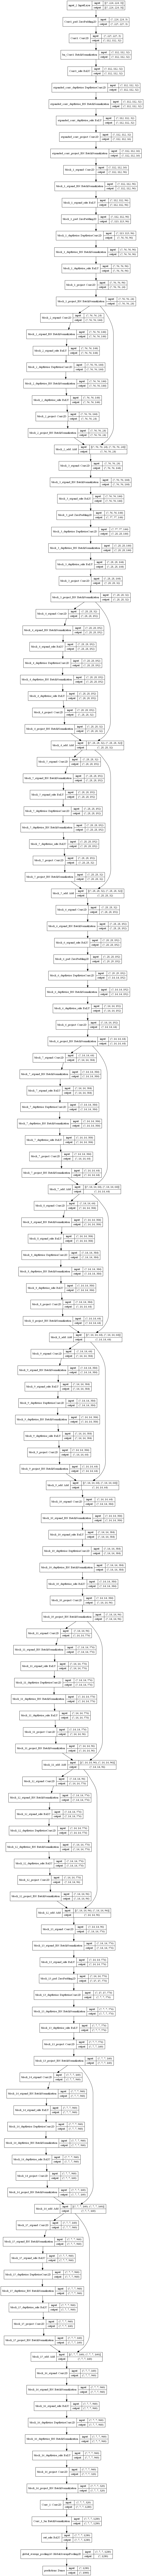

In [32]:
from tensorflow.keras.utils import plot_model

plot_model(mobilenet_model, show_shapes=True)

(224, 224, 3)


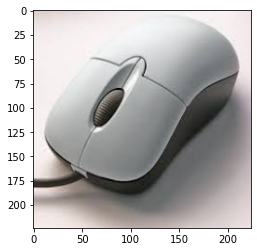

In [37]:
import cv2
img = cv2.imread("mouse.jpg", cv2.IMREAD_COLOR)
img = cv2.resize(img, (224,224))
print(img.shape)
plt.imshow(img)
plt.show()

In [42]:
pred = mobilenet_model.predict(img[np.newaxis,:,:,:]/255.)
np.argmax(pred)

673

#### Model Save -> TFLite

In [46]:
converter = tf.lite.TFLiteConverter.from_keras_model(mobilenet_model)
tflite_model = converter.convert()

with open('./mobilenet_imagenet_model.tflite', 'wb') as f:
    f.write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:\Users\etriai03\AppData\Local\Temp\tmphprb40nv\assets


In [49]:
interpreter = tf.lite.Interpreter(model_path='./mobilenet_imagenet_model.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_details

[{'name': 'input_2',
  'index': 0,
  'shape': array([  1, 224, 224,   3]),
  'shape_signature': array([ -1, 224, 224,   3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [51]:
input_data = np.array(img[np.newaxis,:,:,:]/255.,dtype=input_details[0]['dtype'])
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
np.argmax(output_data)

673